# Multiple Linear Regression:

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.shape

(50, 5)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
import matplotlib.pylab as plt

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

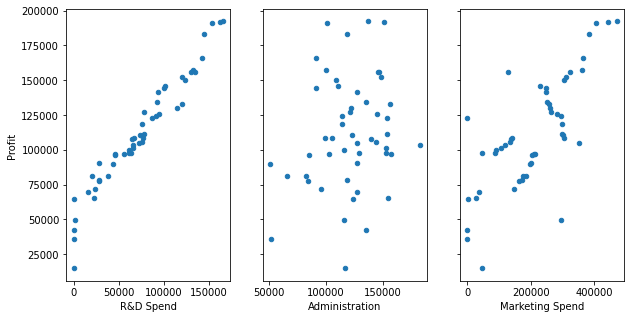

In [8]:
fig, axs =plt.subplots(1,3,sharey=True)

dataset.plot(kind='scatter',x='R&D Spend',y='Profit',ax=axs[0], figsize=(10,5))

dataset.plot(kind='scatter',x='Administration',y='Profit',ax=axs[1])

dataset.plot(kind='scatter',x='Marketing Spend',y='Profit',ax=axs[2])

### Label Encoading:

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
X['State'] =le.fit_transform(X['State'])

NameError: name 'X' is not defined

In [40]:
X.head(10)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [44]:
X.head(10)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


### One Hot Encoading:


In [12]:
dataset1=pd.get_dummies(dataset,columns=['State'],drop_first=True)

In [13]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [13]:
dataset1.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


In [14]:
X = dataset1.drop('Profit',axis=1)

In [15]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [16]:
y = dataset1.Profit 
#or # dataset['Profit']

In [17]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [19]:
X.shape , X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50, 5), (35, 5), (35,), (15, 5), (15,))

# Model:

In [20]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

### y = b0 +  b1*X1 +  b2*X2 +  b3*X3 +  b4*X4 +  b5*X15
X1:R&D,  X2: Admin, X3: Market, X4: State_Florida, X5: State_ NY

In [85]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [87]:
lr.intercept_

lr.coef_

42403.8708705279

In [88]:
lr.predict([[175698, 138954, 491568, 0, 1]])

array([201099.60102352])

In [23]:
y_pred= lr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9358680970046241

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test,y_pred))

7867.855133541396

# Backward Elimination:

In [20]:
import statsmodels.api as sm 

In [21]:
import numpy as np

In [22]:
X_train.shape[0]

35

In [23]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
7,130298.13,145530.06,323876.68,1,0
14,119943.24,156547.42,256512.92,1,0
45,1000.23,124153.04,1903.93,0,1
48,542.05,51743.15,0.00,0,1
29,65605.48,153032.06,107138.38,0,1


### y = b0X0 +  b1*X1 +  b2*X2 +  b3*X3 +  b4*X4 +  b5*X15
y:Profit, X0: '1' , X1:R&D,  X2: Admin, X3: Market, X4: State_Florida, X5: State_ NY

In [24]:
X_train = np.append(np.ones([X_train.shape[0],1]).astype(int), X_train, axis=1)

In [25]:
X_train[:5,]

array([[1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.1994324e+05, 1.5654742e+05, 2.5651292e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0002300e+03, 1.2415304e+05, 1.9039300e+03,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.4205000e+02, 5.1743150e+04, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 6.5605480e+04, 1.5303206e+05, 1.0713838e+05,
        0.0000000e+00, 1.0000000e+00]])

### 1: All Features:

In [41]:
sm_reg=sm.OLS(endog=y_train, exog=X_train[:,[0,1,2,3,4,5]]).fit()

In [42]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           3.78e-18
Time:                        11:08:02   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             752.2
Df Residuals:                      29   BIC:                             761.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.24e+04   9364.122      4.528      0.000    2.33e+04    6.16e+04
x1             0.7908      0.061     12.870      0.000       0.665       0.917
x2             0.0302      0.077      0.393      0.697      -0.127       0.187
x3             0.0310      0.022      1.437      0.162      -0.013       0.075
x4           463.0290   4957.334      0.093      0.926   -9675.857    1.06e+04
x5           304.7996   4023.973      0.076      0.940   -7925.148    8534.747
==============================================================================
Omnibus:                       12.556   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.600
Skew:                          -1.017   Prob(JB):                     0.000676
Kurtosis:                       5.423   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
# H0 ===> (Null Hypothesis)

###   No Association of feature to Target
***

X0: '1' , X1:R&D, X2: Admin, X3: Market, X4: State_Florida, X5: State_ NY

P-Values:

-    X5: State_ NY === .94
-     X4: State_Florida====.926
-     X2: Admin ====0.697
-    X3: Market==== 0.162
        
    

Higher the P-value ===> Lower the significance of that feature(variable)

***
p-value for State_Florida, State_New York, Admistration, Marketing >>> 0.05 :
**H0 is True**

**No Association** of these varables with target('Profit') 

**Fail to Reject H0**
===> Drop these variables

We can drop these, One-by-One:

X2: Admin, X3: Market, X4: State_Florida, X5: State_ NY

***
p-vales << 0.05

**H0 is False**

**Association** of these varables with target('Profit')

**Reject H0**
===> not Drop these variables

We won't Drop:

X1:R&D


### 2. Drop X5: State_ NY :

In [43]:
sm_reg=sm.OLS(endog=y_train, exog=X_train[:,[0,1,2,3,4]]).fit()

In [44]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     147.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           2.91e-19
Time:                        11:09:01   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             750.2
Df Residuals:                      30   BIC:                             758.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.251e+04   9113.522      4.664      0.000    2.39e+04    6.11e+04
x1             0.7916      0.060     13.261      0.000       0.670       0.913
x2             0.0303      0.075      0.401      0.691      -0.124       0.184
x3             0.0309      0.021      1.459      0.155      -0.012       0.074
x4           327.9271   4548.057      0.072      0.943   -8960.445    9616.300
==============================================================================
Omnibus:                       12.688   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.007
Skew:                          -1.016   Prob(JB):                     0.000551
Kurtosis:                       5.482   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values:

-     X4: State_Florida====.943
-     X2: Admin ====0.691
-    X3: Market==== 0.155
        
    

### 3. Drop X4: State_Florida:

In [45]:
sm_reg=sm.OLS(endog=y_train, exog=X_train[:,[0,1,2,3]]).fit()

In [46]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.87e-20
Time:                        11:10:06   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             748.2
Df Residuals:                      31   BIC:                             754.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.245e+04   8932.899      4.752      0.000    2.42e+04    6.07e+04
x1             0.7905      0.057     13.925      0.000       0.675       0.906
x2             0.0311      0.073      0.425      0.674      -0.118       0.181
x3             0.0314      0.020      1.578      0.125      -0.009       0.072
==============================================================================
Omnibus:                       12.702   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.131
Skew:                          -1.011   Prob(JB):                     0.000518
Kurtosis:                       5.507   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values:

-     X2: Admin ====0.674
-    X3: Market==== 0.125
        
    

### 4 Drop X2: Admin:

In [47]:
sm_reg=sm.OLS(endog=y_train, exog=X_train[:,[0,1,3]]).fit() #Best Model

In [48]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     312.2
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.02e-21
Time:                        11:11:25   Log-Likelihood:                -370.22
No. Observations:                  35   AIC:                             746.4
Df Residuals:                      32   BIC:                             751.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.599e+04   3208.110     14.334      0.000    3.95e+04    5.25e+04
x1             0.8006      0.051     15.755      0.000       0.697       0.904
x2             0.0293      0.019      1.540      0.133      -0.009       0.068
==============================================================================
Omnibus:                       11.852   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.647
Skew:                          -0.956   Prob(JB):                      0.00109
Kurtosis:                       5.388   Cond. No.                     4.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-Values:

-    X3: Market==== 0.133
        
    

### 5: Drop X3: MArketing:

In [49]:
sm_reg=sm.OLS(endog=y_train, exog=X_train[:,[0,1]]).fit()

In [50]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.03e-22
Time:                        11:12:18   Log-Likelihood:                -371.47
No. Observations:                  35   AIC:                             746.9
Df Residuals:                      33   BIC:                             750.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.766e+04   3080.345     15.473      0.000    4.14e+04    5.39e+04
x1             0.8582      0.035     24.440      0.000       0.787       0.930
==============================================================================
Omnibus:                       10.556   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.959
Skew:                          -0.913   Prob(JB):                      0.00417
Kurtosis:                       5.045   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
Adj. R-squared Value Reduced, from Previous model, So selct previous one , with 2 Features:

 
# X1: R&D, X2:MArketing